# ------------------------  WELCOME --------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')
import joblib
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import OneHotEncoder

# -----------------------------------------------------------------

## Load Data

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,NaN
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


# -----------------------------------------------------------------

## Data Header

In [3]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

# -----------------------------------------------------------------

## Size of Data

In [4]:
print('Number of Rows :', df.shape[0])
print('Number of Columns :', df.shape[1])

Number of Rows : 319795
Number of Columns : 18


# -----------------------------------------------------------------

## Check The Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319682 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319778 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319753 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# -----------------------------------------------------------------

## Check For Duplicated Data

In [6]:
df.duplicated().sum()

18044

# -----------------------------------------------------------------

## Drop Duplicated Data

In [7]:
df.drop_duplicates(inplace=True)

# -----------------------------------------------------------------

## Check For Missing Data

In [8]:
df.isnull().mean()*100

HeartDisease        0.000000
BMI                 0.000000
Smoking             0.037448
AlcoholDrinking     0.000000
Stroke              0.005634
PhysicalHealth      0.000000
MentalHealth        0.000000
DiffWalking         0.000000
Sex                 0.000000
AgeCategory         0.000000
Race                0.000000
Diabetic            0.013919
PhysicalActivity    0.000000
GenHealth           0.000000
SleepTime           0.000000
Asthma              0.000000
KidneyDisease       0.000000
SkinCancer          0.082518
dtype: float64

# -----------------------------------------------------------------

## Drop Missing Data

In [9]:
df.dropna(axis=0,inplace=True)

# -----------------------------------------------------------------

## Univariate Analysis.

In [10]:
cat_col = df.select_dtypes(include="object_").columns
cat_col

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [11]:
for col in cat_col:
    print(df[col].value_counts())
    print(df[col].unique())
    print("\n",'-'*50)

No     274134
Yes     27213
Name: HeartDisease, dtype: int64
['No' 'Yes']

 --------------------------------------------------
No     173959
Yes    127388
Name: Smoking, dtype: int64
['Yes' 'No']

 --------------------------------------------------
No     279774
Yes     21573
Name: AlcoholDrinking, dtype: int64
['No' 'Yes']

 --------------------------------------------------
No     289305
Yes     12042
Name: Stroke, dtype: int64
['No' 'Yes']

 --------------------------------------------------
No     257089
Yes     44258
Name: DiffWalking, dtype: int64
['No' 'Yes']

 --------------------------------------------------
Female    159403
Male      141944
Name: Sex, dtype: int64
['Female' 'Male']

 --------------------------------------------------
65-69          31604
60-64          31173
70-74          29215
55-59          27588
50-54          23714
80 or older    23290
75-79          20663
45-49          20505
18-24          19993
40-44          19826
35-39          19520
30-34         

# -----------------------------------------------------------------

### Visualize Categorical Data

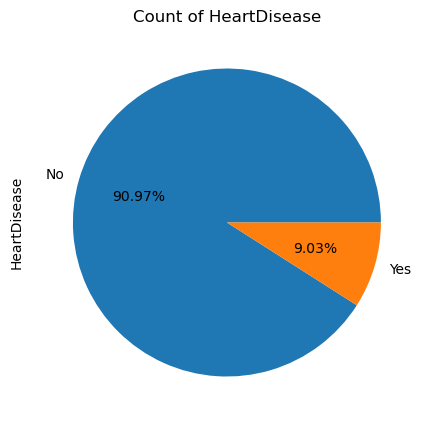

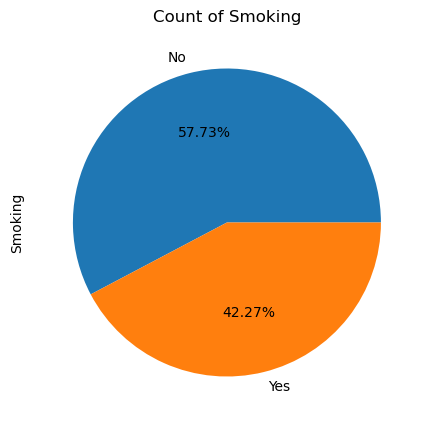

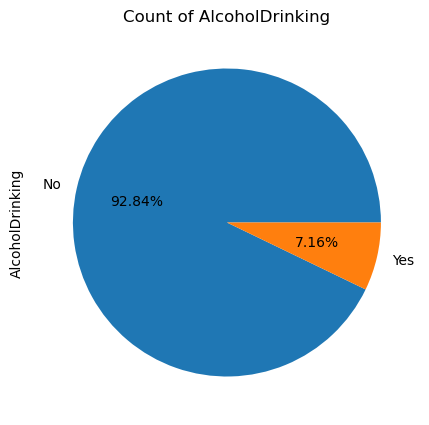

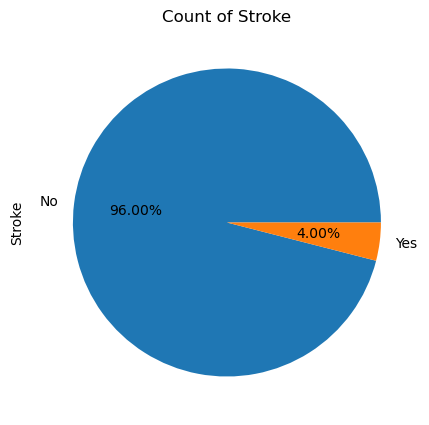

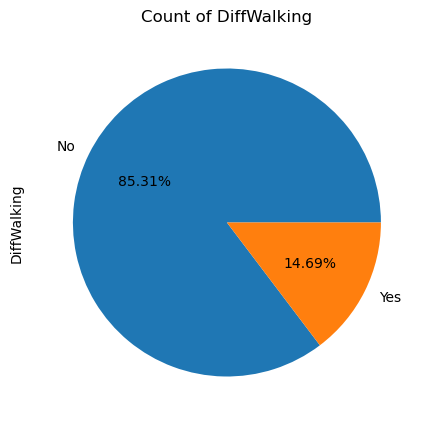

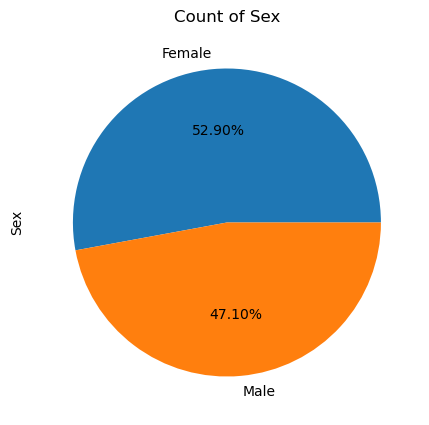

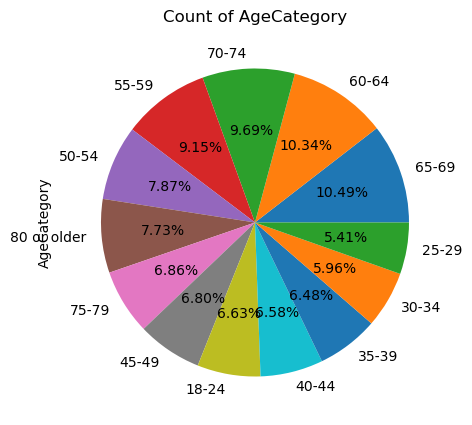

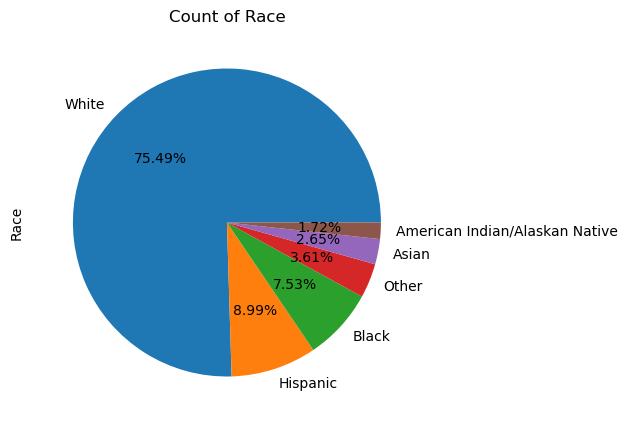

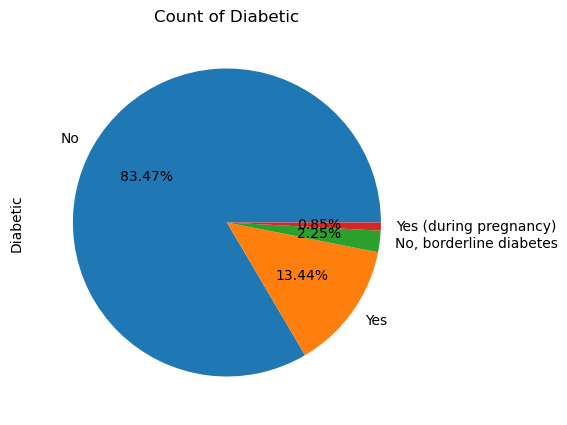

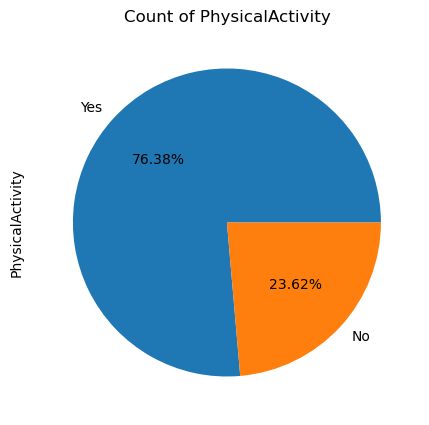

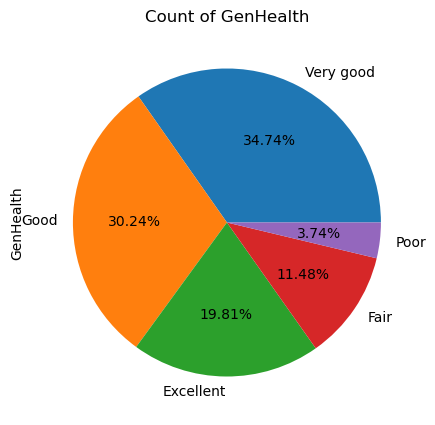

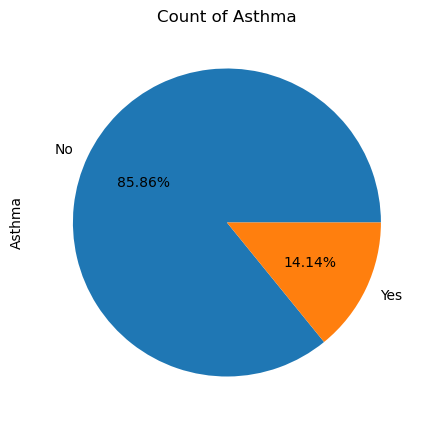

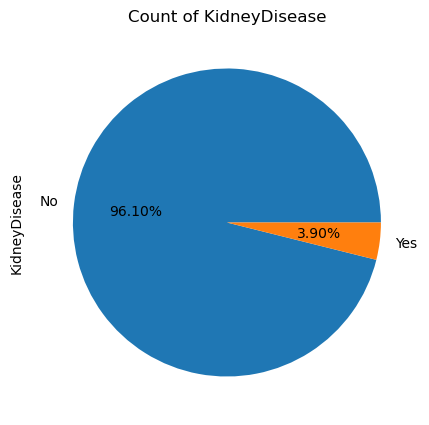

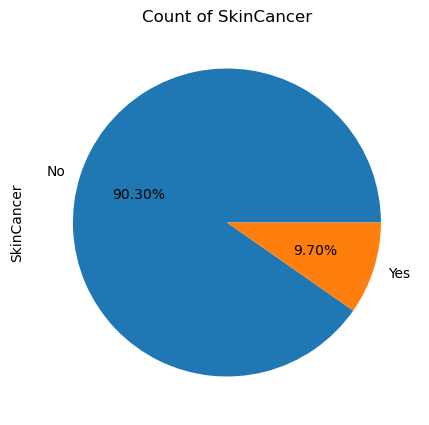

In [12]:
for col in cat_col:
    plt.figure(figsize=(10,5))
    df[col].value_counts().plot.pie(autopct='%.2f%%')    
    plt.title(f'Count of {col}')
    plt.show()

# -----------------------------------------------------------------

### Visualize Categorical Data Wtih Target

AxesSubplot(0.125,0.11;0.775x0.77) 



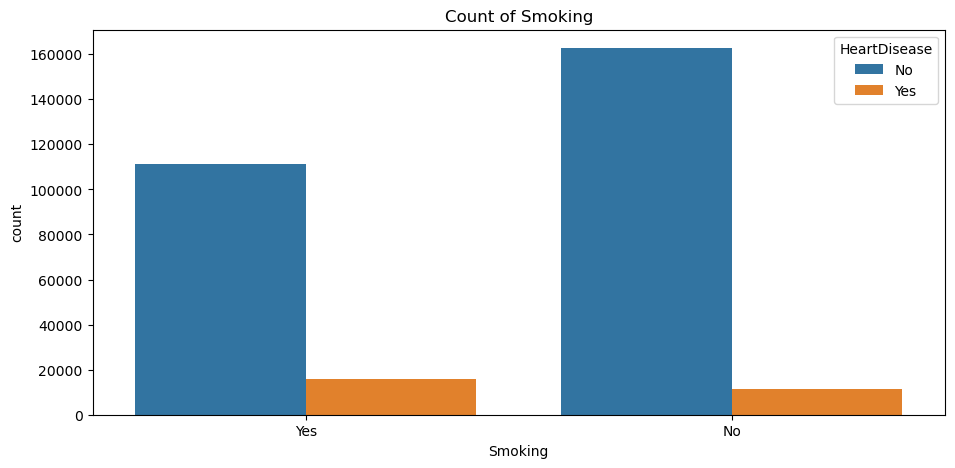

AxesSubplot(0.125,0.11;0.775x0.77) 



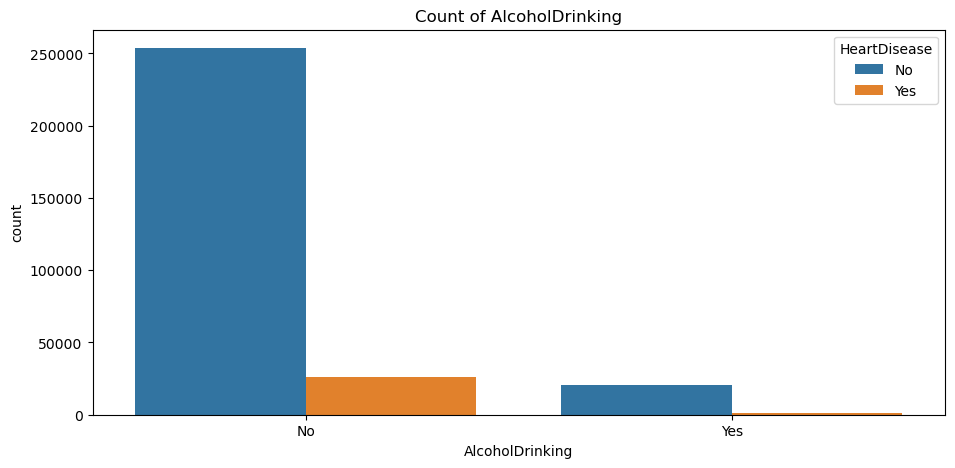

AxesSubplot(0.125,0.11;0.775x0.77) 



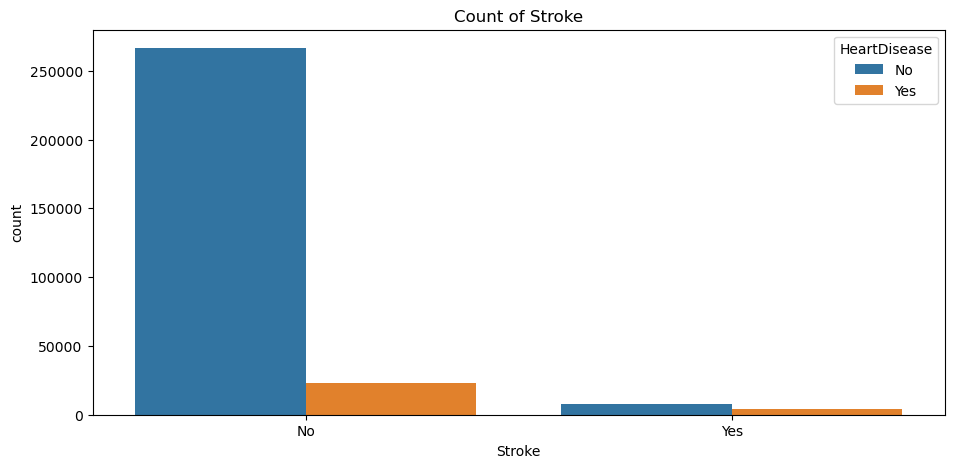

AxesSubplot(0.125,0.11;0.775x0.77) 



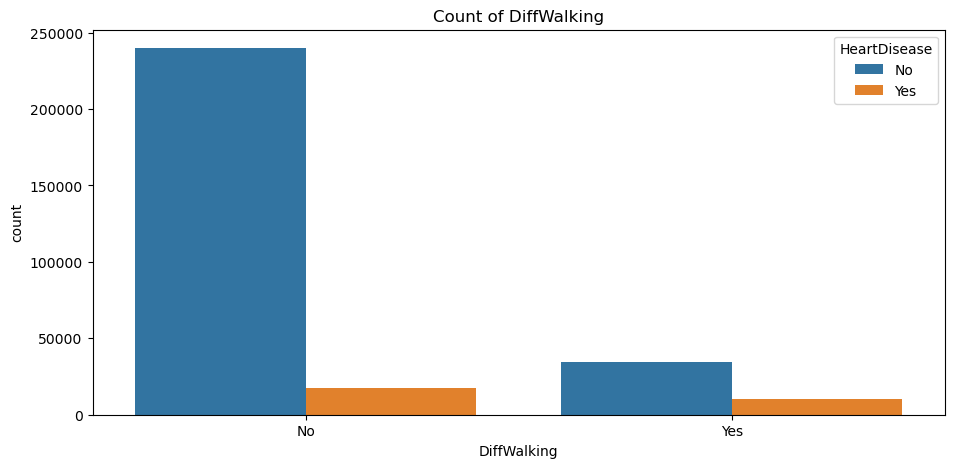

AxesSubplot(0.125,0.11;0.775x0.77) 



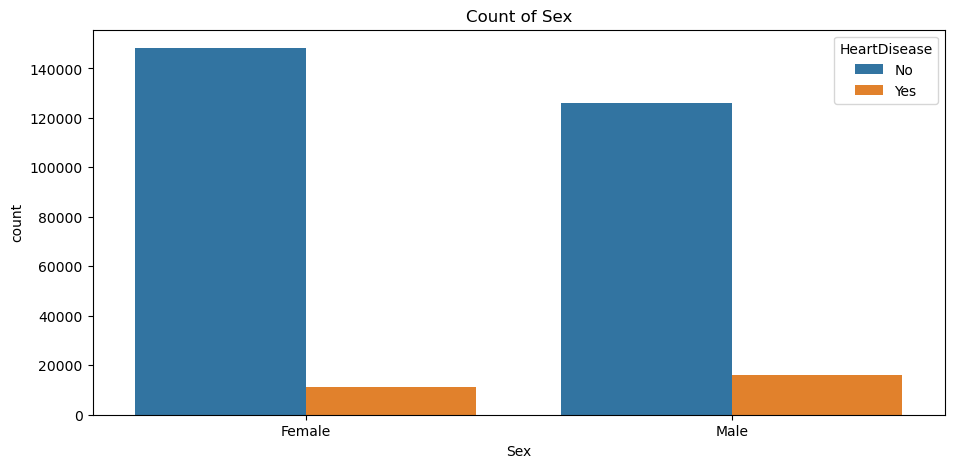

AxesSubplot(0.125,0.11;0.775x0.77) 



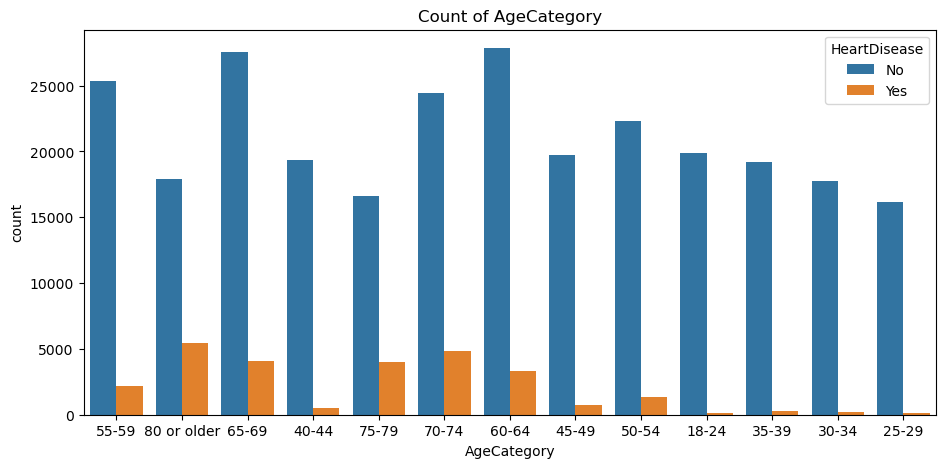

AxesSubplot(0.125,0.11;0.775x0.77) 



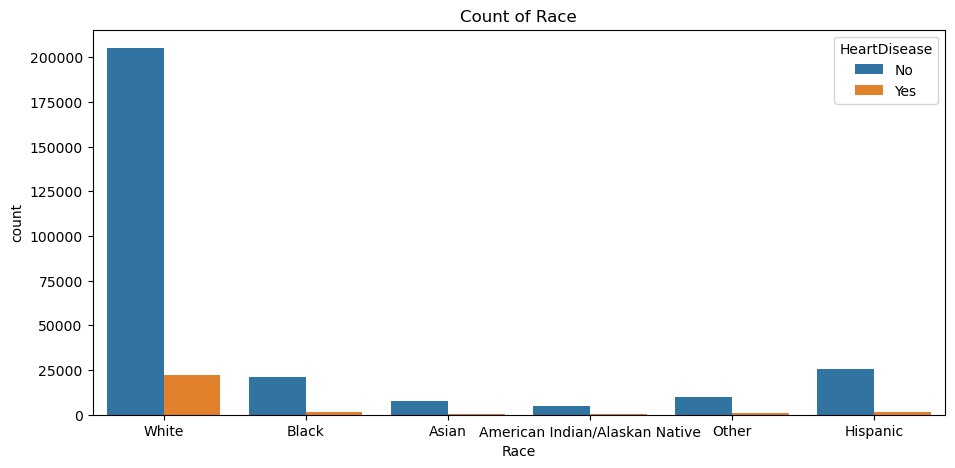

AxesSubplot(0.125,0.11;0.775x0.77) 



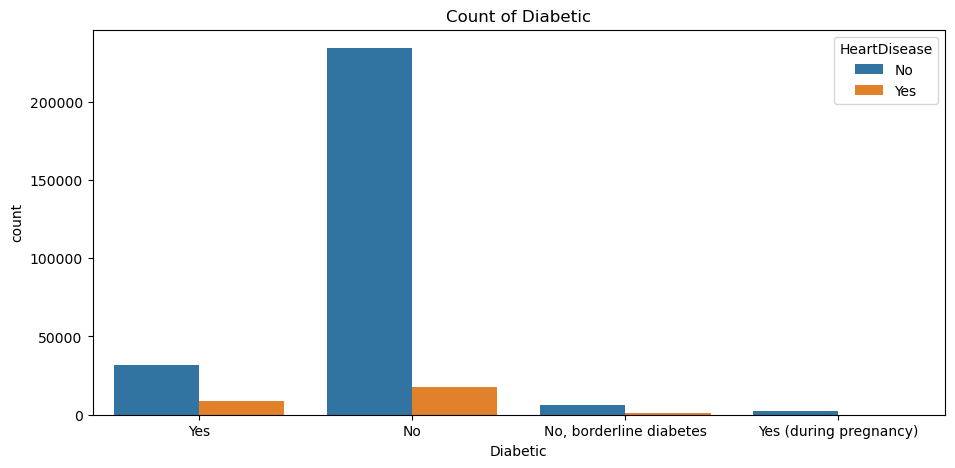

AxesSubplot(0.125,0.11;0.775x0.77) 



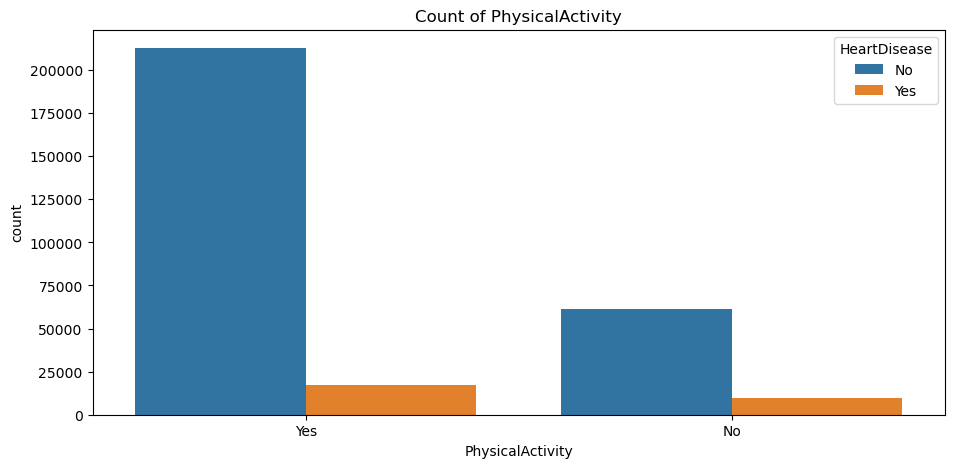

AxesSubplot(0.125,0.11;0.775x0.77) 



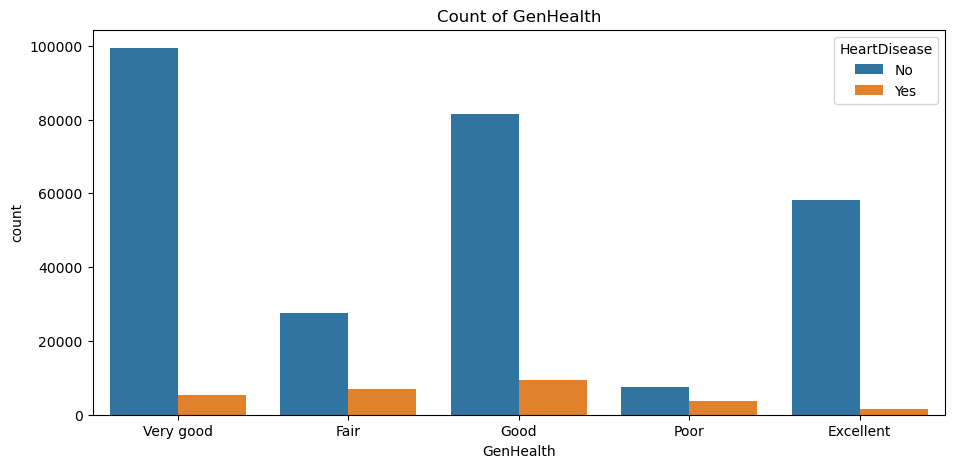

AxesSubplot(0.125,0.11;0.775x0.77) 



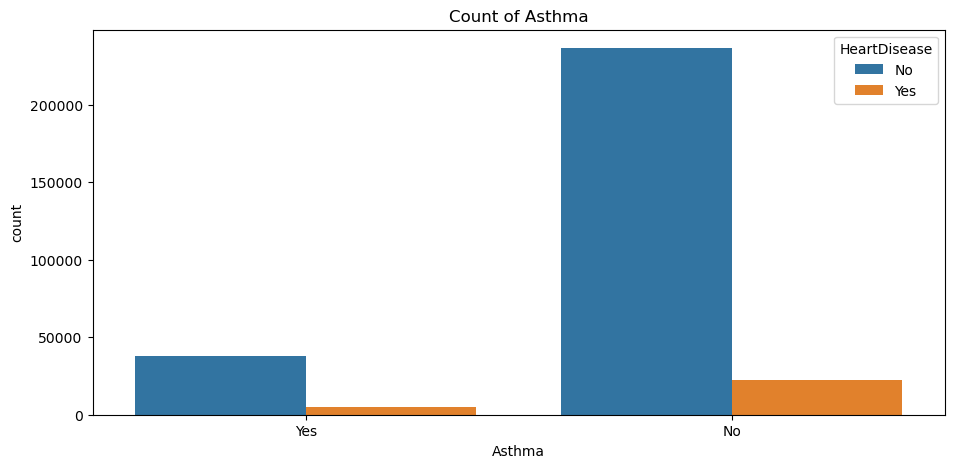

AxesSubplot(0.125,0.11;0.775x0.77) 



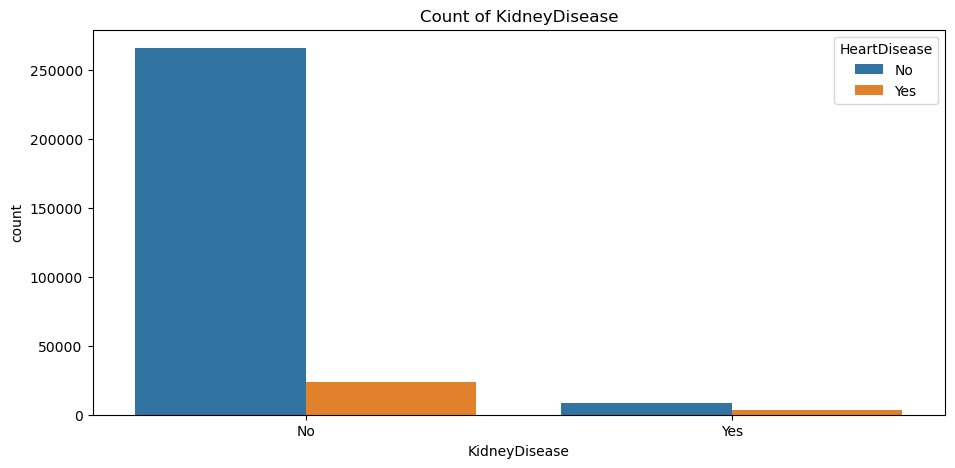

AxesSubplot(0.125,0.11;0.775x0.77) 



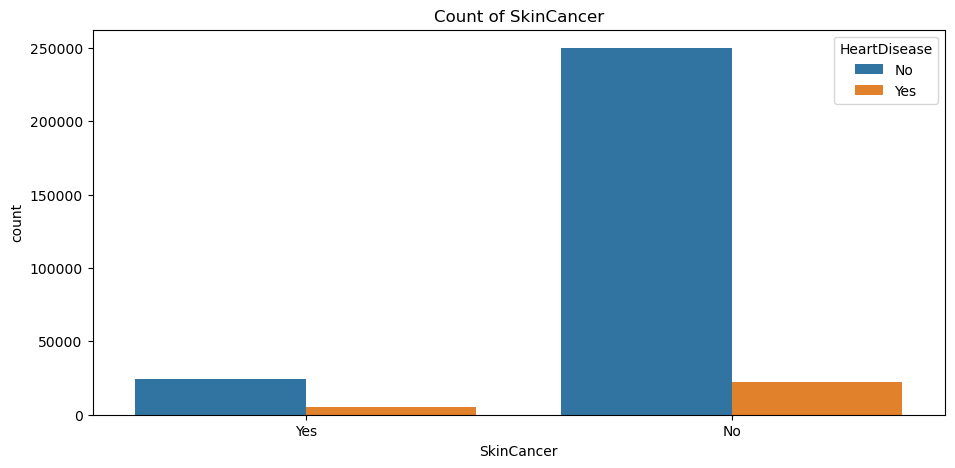

In [13]:
for col in cat_col:
    if col != 'HeartDisease' :
        plt.figure(figsize=(11,5))
        print(sns.countplot(data=df,x=col, hue=df['HeartDisease']),'\n')
        plt.title(f'Count of {col}')
        plt.show()

# -----------------------------------------------------------------

### Visualize Numerical Data

In [14]:
num_cols = df.select_dtypes(include="number").columns

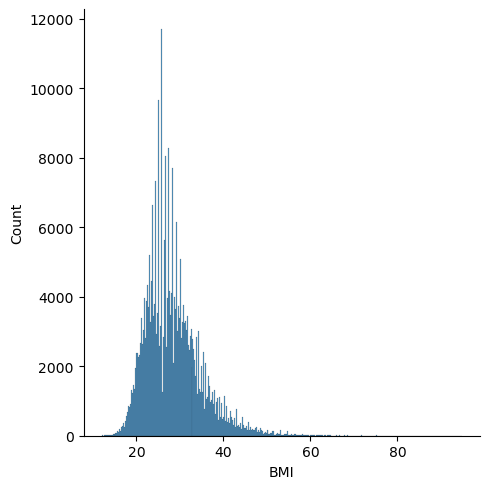

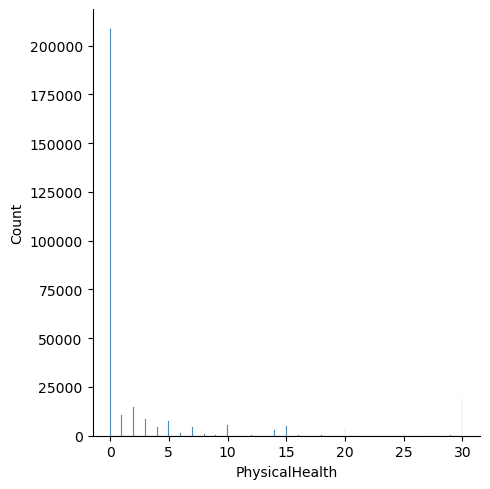

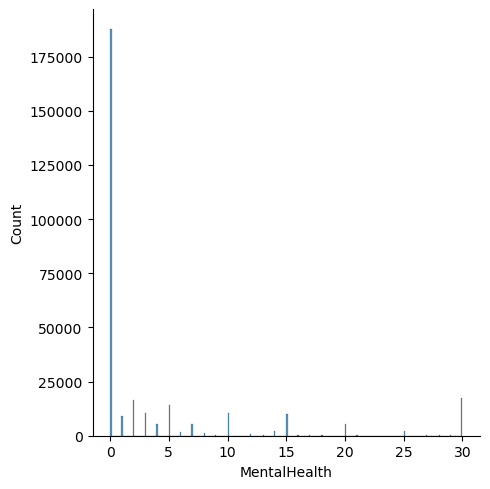

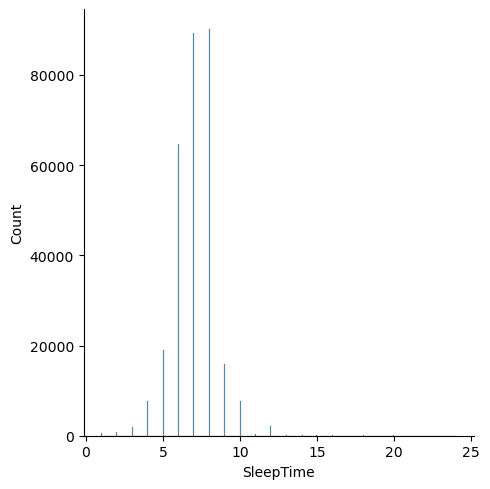

In [15]:
for col in num_cols:
    sns.displot(data = df ,  x = col)

# -----------------------------------------------------------------

## Pre_processing data

In [16]:
df['PhysicalHealth'].unique()

array([ 3,  0, 20, 28,  6, 15,  5, 30,  2, 21,  1,  4, 10, 14,  7, 18,  8,
       25, 29, 12, 23, 26, 16, 22, 19,  9, 13, 17, 27, 11, 24],
      dtype=int64)

In [17]:
df['MentalHealth'].unique()

array([30,  0,  5, 15,  8,  4,  3,  2, 10, 14,  1, 28, 20, 16, 12,  7, 25,
       17,  9, 18, 21, 29,  6, 22, 13, 23, 27, 24, 26, 11, 19],
      dtype=int64)

In [18]:
def get_binned(x):
    if x == 0:
        return '0'
    elif x in range(1,10):
            return '1-9'
    elif x in range(10,20):
        return '10-19'
    elif x in range(20,30):
        return '20-29'
    elif x == 30:
        return '30'

In [19]:
df['PhysicalHealth'] = df['PhysicalHealth'].apply(get_binned)
df['MentalHealth'] = df['MentalHealth'].apply(get_binned)

In [20]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,1-9,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20-29,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
4,No,23.71,No,No,No,20-29,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
5,Yes,28.87,Yes,No,No,1-9,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,1-9,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [21]:
df['SleepTime'].unique()

array([ 5,  7,  8, 12,  4,  9, 10, 15,  6,  3,  2, 18,  1, 14, 16, 20, 11,
       13, 17, 24, 19, 21, 22, 23], dtype=int64)

In [22]:
def sleep_binned(x):
    if x in range(1,5):
        return '1-4'
    elif x in range(4,7):
        return '4-6'
    elif x in range(6,9):
        return '6-8'
    elif x in range(8,13):
        return '8-12'
    elif x in range(12,25):
        return '12-24'

In [23]:

df['SleepTime'] = df['SleepTime'].apply(sleep_binned)

In [24]:
df['BMI'].unique()

array([16.6 , 20.34, 26.58, ..., 62.42, 51.46, 46.56])

In [25]:
#def bmi_binned(x):
   # if x < 18.5:
      #  return 'Underweight'
   # elif x >= 18.5 and x < 25:
    #    return 'Normalweigt'
   # elif x >= 25 and x < 30:
    #    return 'Overweight'
  #  else :
   #     return 'Obesity'

In [26]:
#df['BMI'] = df['BMI'].apply(bmi_binned)

In [27]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,1-9,30,No,Female,55-59,White,Yes,Yes,Very good,4-6,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,6-8,No,No,No
2,No,26.58,Yes,No,No,20-29,30,No,Male,65-69,White,Yes,Yes,Fair,6-8,Yes,No,No
4,No,23.71,No,No,No,20-29,0,Yes,Female,40-44,White,No,Yes,Very good,6-8,No,No,No
5,Yes,28.87,Yes,No,No,1-9,0,Yes,Female,75-79,Black,No,No,Fair,8-12,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,1-9,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,4-6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,4-6,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,4-6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,8-12,No,No,No


In [28]:
#df['Diabetic'] = df['Diabetic'].replace('No, borderline diabetes', 'No')
#df['Diabetic'] = df['Diabetic'].replace('Yes (during pregnancy)', 'Yes')

In [29]:
#df['Diabetic'].value_counts()

# -----------------------------------------------------------------

# Univariate Analysis After Handling The Dataset

In [30]:
#cat_col = df.select_dtypes(include="object_").columns
#for col in cat_col:
    #print(df[col].value_counts())
   # print(df[col].unique())
   # print("\n"*2,'-'*50)

### Visualize Categorical Data

In [31]:
#for col in cat_col:
   # plt.figure(figsize=(10,5))
  #  df[col].value_counts().plot.pie(autopct='%.2f%%')    
  #  plt.title(f'Count of {col}')
  #  plt.show()

### Visualize Categorical With Target

In [32]:
#for col in cat_col:
  #  if col != 'HeartDisease' :
  #      plt.figure(figsize=(11,5))
  #      print(sns.countplot(data=df,x=col, hue=df['HeartDisease']),'\n')
  #      plt.title(f'Count of {col}')
  #      plt.show()

# -----------------------------------------------------------------

## Reset Index Of the Data

In [33]:
df.reset_index(drop=True)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,1-9,30,No,Female,55-59,White,Yes,Yes,Very good,4-6,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,6-8,No,No,No
2,No,26.58,Yes,No,No,20-29,30,No,Male,65-69,White,Yes,Yes,Fair,6-8,Yes,No,No
3,No,23.71,No,No,No,20-29,0,Yes,Female,40-44,White,No,Yes,Very good,6-8,No,No,No
4,Yes,28.87,Yes,No,No,1-9,0,Yes,Female,75-79,Black,No,No,Fair,8-12,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301342,Yes,27.41,Yes,No,No,1-9,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,4-6,Yes,No,No
301343,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,4-6,Yes,No,No
301344,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,4-6,No,No,No
301345,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,8-12,No,No,No


# -----------------------------------------------------------------

## Encoding Data

In [34]:
cat_col2 = df.select_dtypes(include="object_").columns
for col in cat_col2:
    print(df[col].value_counts())
    print(df[col].unique())
    print("\n"*2,'-'*50)

No     274134
Yes     27213
Name: HeartDisease, dtype: int64
['No' 'Yes']


 --------------------------------------------------
No     173959
Yes    127388
Name: Smoking, dtype: int64
['Yes' 'No']


 --------------------------------------------------
No     279774
Yes     21573
Name: AlcoholDrinking, dtype: int64
['No' 'Yes']


 --------------------------------------------------
No     289305
Yes     12042
Name: Stroke, dtype: int64
['No' 'Yes']


 --------------------------------------------------
0        208385
1-9       52894
30        19473
10-19     14556
20-29      6039
Name: PhysicalHealth, dtype: int64
['1-9' '0' '20-29' '10-19' '30']


 --------------------------------------------------
0        187639
1-9       63586
10-19     23816
30        17338
20-29      8968
Name: MentalHealth, dtype: int64
['30' '0' '1-9' '10-19' '20-29']


 --------------------------------------------------
No     257089
Yes     44258
Name: DiffWalking, dtype: int64
['No' 'Yes']


 ------------------

In [35]:
BMI_Binned={
    "Overweight":1,
    "Obesity":2,
    "Normalweigt":3,
    "Underweight":4}
df["BMI"]=df['BMI'].map(BMI_Binned)
###
Race_Binned={
    "White":1,
    "Hispanic":2,
    "Black":3,
    "Other":4,
    "Asian":5,
    "American Indian/Alaskan Native":6}
df['Race']=df['Race'].map(Race_Binned)
###
Gen_Binned={
    "Very good":1,
    "Good":2,
    "Excellent":3,
    "Fair":4,
    "Poor":5}
df['GenHealth']=df['GenHealth'].map(Gen_Binned)
###
Sleep_Binned={
    "1-4":1,
    "4-6":2,
    "6-8":3,
    "8-12":4,
    "12-24":5}
df['SleepTime']=df['SleepTime'].map(Sleep_Binned)
###
Phys_Binned={
    "0":1,
    "1-9":2,           
    "10-19":3,    
    "20-29":4,
    "30":5}
df['PhysicalHealth']=df['PhysicalHealth'].map(Phys_Binned)
###
Age={
    "18-24"       :1,
    "25-29"       :2,
    "30-34"       :3,
    "35-39"       :4,
    "40-44"       :5,
    "45-49"       :6,
    "50-54"       :7,
    "55-59"       :8,
    "60-64"       :9,
    "65-69"       :10,
    "70-74"       :11,
    "75-79"       :12,
    "80 or older" :13}
df['AgeCategory']=df['AgeCategory'].map(Age)
###
Mental={
    '0'    :1, 
    '1-9'  :2, 
    '10-19':3,
    '20-29':4,
    '30'   :5}
df['MentalHealth']=df['MentalHealth'].map(Mental)

In [36]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,NaN,Yes,No,No,2,5,No,Female,8,1,Yes,Yes,1,2,Yes,No,Yes
1,No,NaN,No,No,Yes,1,1,No,Female,13,1,No,Yes,1,3,No,No,No
2,No,NaN,Yes,No,No,4,5,No,Male,10,1,Yes,Yes,4,3,Yes,No,No
4,No,NaN,No,No,No,4,1,Yes,Female,5,1,No,Yes,1,3,No,No,No
5,Yes,NaN,Yes,No,No,2,1,Yes,Female,12,3,No,No,4,4,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,NaN,Yes,No,No,2,1,Yes,Male,9,2,Yes,No,4,2,Yes,No,No
319791,No,NaN,Yes,No,No,1,1,No,Male,4,2,No,Yes,1,2,Yes,No,No
319792,No,NaN,No,No,No,1,1,No,Female,6,2,No,Yes,2,2,No,No,No
319793,No,NaN,No,No,No,1,1,No,Female,2,2,No,No,2,4,No,No,No


In [37]:
df.select_dtypes(include="object_").columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [38]:
encoded_col=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease',
       'SkinCancer']

In [39]:
encoder=ColumnTransformer(transformers=[('ENCODE',OneHotEncoder(sparse=False,drop='first'),encoded_col)],remainder='passthrough')

In [40]:
encoder

ColumnTransformer(remainder='passthrough',
                  transformers=[('ENCODE',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['HeartDisease', 'Smoking', 'AlcoholDrinking',
                                  'Stroke', 'DiffWalking', 'Sex', 'Diabetic',
                                  'PhysicalActivity', 'Asthma', 'KidneyDisease',
                                  'SkinCancer'])])

In [41]:
ASada#cat_cols = df.select_dtypes(include="object_").columns

In [42]:
#df['HeartDisease'] = df['HeartDisease'].map({'Yes':1, 'No':0})

In [43]:
#df = pd.get_dummies(data=df, columns=cat_cols[1:], drop_first=True)
#df

# -----------------------------------------------------------------

## Know  Check and build many techniques to train and predict 

In [44]:
x = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [45]:
models = list()
models.append(("Tree" , DecisionTreeClassifier()))
models.append(("Log" , LogisticRegression()))
models.append(("XG" , XGBClassifier()))
models.append(("Raf" , RandomForestClassifier()))


for model in models:
    steps = list()
    steps.append(("Scaler" , StandardScaler()))
    steps.append(('Encode',OneHotEncoder()))
    steps.append(model)
    pipeline=Pipeline(steps=steps)
    scores = cross_validate(pipeline , x , y , cv =  5 , scoring="accuracy" , return_train_score=True)
    print(model[0])
    print("Train_accuracy", scores["train_score"].mean())
    print("Test_accuracy" , scores["test_score"].mean())
    print("-" * 25)

Tree
Train_accuracy nan
Test_accuracy nan
-------------------------
Log
Train_accuracy nan
Test_accuracy nan
-------------------------
XG
Train_accuracy nan
Test_accuracy nan
-------------------------
Raf
Train_accuracy nan
Test_accuracy nan
-------------------------


# -----------------------------------------------------------------


# i will choose Decision Tree model because train & test accuracy best and small size than other models  to build web application

In [46]:
steps = list()
steps.append(("Scaler" , StandardScaler() ))
steps.append(("Model" , DecisionTreeClassifier()))

In [47]:
pipeline = Pipeline(steps = steps)

In [48]:
scores = cross_validate(pipeline , x , y, cv = 5 , scoring="accuracy" , return_train_score=True)

In [49]:
scores["train_score"].mean()

nan

In [50]:
scores["test_score"].mean()

nan

In [51]:
model = pipeline.fit(x,y)

ValueError: could not convert string to float: 'Yes'

In [ ]:
forward = SequentialFeatureSelector(pipeline  , tol = None , direction="forward")

In [ ]:
forward.fit(x,y)

In [ ]:
data=pd.DataFrame(forward.transform(x) , columns=forward.get_feature_names_out())
data

# -----------------------------------------------------------------


## Select Best Features

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.2,stratify=y,random_state=7)

In [ ]:
data

In [ ]:
model_1=pipeline.fit(data,y)

In [ ]:
y_pred=pipeline.predict(x_test)

In [ ]:
accuracy_score(y_test ,y_pred)


In [ ]:
model_1=pipeline.fit(data,y)

In [ ]:
joblib.dump(model_1,"model1.h5")
joblib.dump(data.columns,"input1.h5")

In [ ]:
data.columns

# -----------------------------------------------------------------


## Import Streamlit To build Machine Learning Model

In [ ]:
%%writefile Heart_Disease.py

import streamlit  as st
import joblib
import pandas as pd

Model = joblib.load("model1.h5")
Inputs = joblib.load("input1.h5")

def predict(BMI, PhysicalHealth,Smoking_Yes,Stroke_Yes, Sex_Male, Diabetic_Yes,
       PhysicalActivity_Yes, KidneyDisease_Yes):
    
    if Smoking_Yes == 'Yes': 
        Smoking_Yes = 1
    elif Smoking_Yes == 'No':
        Smoking_Yes = 0
    else:
        Smoking_Yes=np.nan
        
    if Stroke_Yes == 'Yes': 
        Stroke_Yes = 1
    elif Stroke_Yes == 'No':
        Stroke_Yes = 0
    else:
        Stroke_Yes=np.nan 
        
    if Sex_Male == 'Male':
        Sex_Male = 1
    elif Sex_Male == 'Female':
        Sex_Male =0
    else:
        Sex_Male = np.nan
        
    if Diabetic_Yes == 'Yes':
        Diabetic_Yes = 1 
    elif Diabetic_Yes == 'No':
        Diabetic_Yes = 0
    else:
        Diabetic_Yes =np.nan
        
    if PhysicalActivity_Yes == 'Yes':
        PhysicalActivity_Yes=1
    elif PhysicalActivity_Yes == 'No':
        PhysicalActivity_Yes=0
    else:
        PhysicalActivity_Yes=np.nan
    
    if KidneyDisease_Yes == 'Yes':
        KidneyDisease_Yes=1
    elif KidneyDisease_Yes=='No':
        KidneyDisease_Yes=0
    else:
        KidneyDisease_Yes=np.nan
        
        
        
   # test_df = pd.DataFrame(columns = Inputs)
   # test_df.at[0,'BMI'] = BMI
   # test_df.at[0,'PhysicalHealth'] = PhysicalHealth
   # test_df.at[0,"Smoking_Yes"] = Smoking_Yes
   # test_df.at[0,"Stroke_Yes"] = Stroke_Yes    
   # test_df.at[0,"Sex_Male"] = Sex_Male
   # test_df.at[0,"Diabetic_Yes"] = Diabetic_Yes
   # test_df.at[0,"PhysicalActivity_Yes"] = PhysicalActivity_Yes
   # test_df.at[0,"KidneyDisease_Yes"] = KidneyDisease_Yes
   # result = Model.predict(test_df)[0]
   # return result


def main():
    
    st.title("Estimate your Heart Disease  ")
    st.write("Welcome To Medical Application Maded By Machine Learning")
    st.markdown('Heart failure can affect different people in different ways,Symptoms can come on suddenly and be initially severe (acute heart failure) or they can appear over time and gradually get worse (chronic heart failure). If you have heart failure, you may have one, or a combination, of these symptoms.')
    st.image('Heart_Image.jpg')    
    st.video('Heart.mp4')
    
    
    
    BMI = st.slider("BMI" , min_value=15 , max_value=80 , value=20 , step=1)
    PhysicalHealth = st.slider("PhysicalHealth" ,min_value= 0,max_value=35,value=15,step=1)
    Smoking_Yes = st.selectbox("Smoker",['Yes','No'])
    Stroke_Yes = st.selectbox("Stroke",['Yes','No'])
    Sex_Male = st.selectbox("Sex"['Yes','No'])
    Diabetic_Yes = st.selectbox("Diabetic",['Yes','No'])
    PhysicalActivity_Yes = st.selectbox("PhysicalActivity",['Yes','No'])
    KidneyDisease_Yes = st.selectbox("KidneyDisease",['Yes','No'])
    
    
    if st.button("Predict"):
        result = predict(BMI, PhysicalHealth, Smoking_Yes, Stroke_Yes , Sex_Male , Diabetic_Yes , 
                         PhysicalActivity_Yes  , KidneyDisease_Yes)
        if result == 0 :
            return st.write("Positive😂😂You Will Die 😂😂")
        elif  result == 1 :
            return st.write("Negative")
        else : 
            return st.write("No Result , Please Try Again Later")
        st.write("Your Result is {}",'\nBest Wishes'.format(result))   
if __name__ == "__main__":
    main()
    

In [ ]:
!streamlit run Heart_Disease.py

## Directed by Robert B.Weide  😂😂